In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [27]:
df_train.head()

rent_approval_date             town block            street_name  flat_type  \
0            2021-09      jurong east   257  Jurong East Street 24     3 room   
1            2022-05            bedok   119       bedok north road     4-room   
2            2022-10        toa payoh   157     lorong 1 toa payoh     3-room   
3            2021-08        pasir ris   250    Pasir Ris Street 21  executive   
4            2022-11  kallang/whampoa    34           Whampoa West     3-room   

       flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0  new generation            67.0       yes                 1983  1.344518   
1  new generation            92.0       yes                 1978  1.330186   
2        improved            67.0       yes                 1971  1.332242   
3       apartment           149.0       yes                 1993  1.370239   
4        improved            68.0       yes                 1972  1.320502   

    longitude  elevation            subzone planning_area          region  \
0  103.738630        0.0         yuhua east   jurong east     west region   
1  103.938717        0.0        bedok north         bedok     east region   
2  103.845643        0.0  toa payoh central     toa payoh  central region   
3  103.962894        0.0    pasir ris drive     pasir ris     east region   
4  103.863341        0.0          bendemeer       kallang  central region   

   monthly_rent  
0          1600  
1          2250  
2          1900  
3          2850  
4          2100

## Data Preprocessing

In [28]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [29]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

In [30]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [31]:
df_train

rent_approval_date             town block            street_name  \
0             2021-09-01      jurong east   257  Jurong East Street 24   
1             2022-05-01            bedok   119       bedok north road   
2             2022-10-01        toa payoh   157     lorong 1 toa payoh   
3             2021-08-01        pasir ris   250    Pasir Ris Street 21   
4             2022-11-01  kallang/whampoa    34           Whampoa West   
...                  ...              ...   ...                    ...   
59995         2021-09-01       ang mo kio   441   Ang Mo Kio Avenue 10   
59996         2023-04-01      bukit merah   95a         henderson road   
59997         2022-06-01         tampines  862a     tampines street 83   
59998         2023-01-01            bedok    67     Bedok Sth Avenue 3   
59999         2023-02-01       ang mo kio   445   Ang Mo Kio Avenue 10   

       flat_type      flat_model  floor_area_sqm furnished  \
0         3 room  new generation            67.0       yes   
1         4-room  new generation            92.0       yes   
2         3-room        improved            67.0       yes   
3      executive       apartment           149.0       yes   
4         3-room        improved            68.0       yes   
...          ...             ...             ...       ...   
59995     3 room  new generation            67.0       yes   
59996     4-room         model a            83.0       yes   
59997     5-room        improved           122.0       yes   
59998     5-room        standard           123.0       yes   
59999     3-room  new generation            67.0       yes   

       lease_commence_date  latitude   longitude  elevation  \
0                     1983  1.344518  103.738630        0.0   
1                     1978  1.330186  103.938717        0.0   
2                     1971  1.332242  103.845643        0.0   
3                     1993  1.370239  103.962894        0.0   
4                     1972  1.320502  103.863341        0.0   
...                    ...       ...         ...        ...   
59995                 1979  1.366050  103.854168        0.0   
59996                 2019  1.286493  103.821434        0.0   
59997                 1988  1.355064  103.936507        0.0   
59998                 1977  1.318974  103.944076        0.0   
59999                 1979  1.366980  103.855718        0.0   

                 subzone planning_area             region  monthly_rent  \
0             yuhua east   jurong east        west region          1600   
1            bedok north         bedok        east region          2250   
2      toa payoh central     toa payoh     central region          1900   
3        pasir ris drive     pasir ris        east region          2850   
4              bendemeer       kallang     central region          2100   
...                  ...           ...                ...           ...   
59995         chong boon    ang mo kio  north-east region          2200   
59996     henderson hill   bukit merah     central region          4100   
59997      tampines west      tampines        east region          2250   
59998        bedok south         bedok        east region          4700   
59999         chong boon    ang mo kio  north-east region          2850   

       rent_approval_year  rent_approval_month  
0                    2021          2021.750000  
1                    2022          2022.416667  
2                    2022          2022.833333  
3                    2021          2021.666667  
4                    2022          2022.916667  
...                   ...                  ...  
59995                2021          2021.750000  
59996                2023          2023.333333  
59997                2022          2022.500000  
59998                2023          2023.083333  
59999                2023          2023.166667  

[60000 rows x 18 columns]

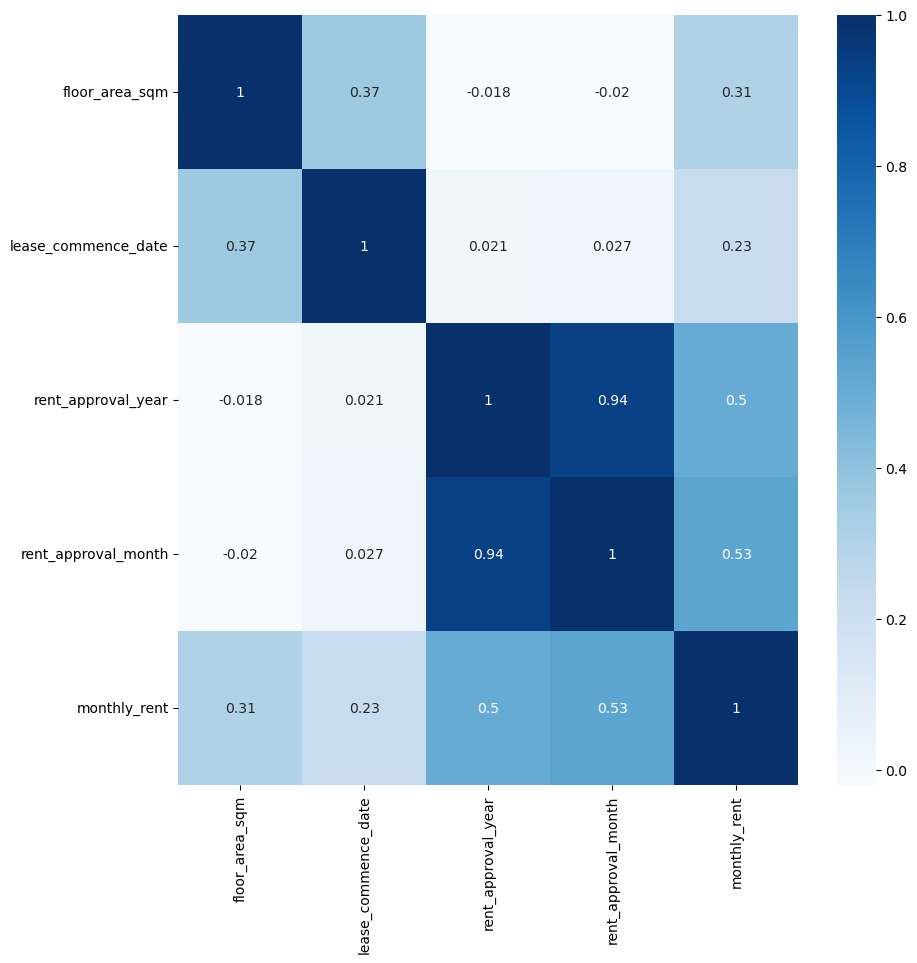

In [35]:
#draw corr heatmap
corr = df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')

fig = plt.gcf()
fig.set_size_inches(10, 10)  # 设置图的大小，单位为英寸

# 显示图
plt.show()


In [36]:
df_train.describe()

rent_approval_date  floor_area_sqm  lease_commence_date  \
count                          60000    60000.000000         60000.000000   
mean   2022-03-20 00:57:57.599999744       94.480458          1990.876367   
min              2021-01-01 00:00:00       34.000000          1966.000000   
25%              2021-08-01 00:00:00       73.000000          1981.000000   
50%              2022-03-01 00:00:00       93.000000          1988.000000   
75%              2022-12-01 00:00:00      110.000000          2000.000000   
max              2023-07-01 00:00:00      215.000000          2019.000000   
std                              NaN       24.082642            12.141435   

           latitude     longitude  elevation  monthly_rent  \
count  60000.000000  60000.000000    60000.0  60000.000000   
mean       1.359443    103.840110        0.0   2590.328333   
min        1.270380    103.685228        0.0    300.000000   
25%        1.330939    103.778803        0.0   2100.000000   
50%        1.354024    103.845301        0.0   2400.000000   
75%        1.386968    103.897418        0.0   3000.000000   
max        1.457071    103.964915        0.0   6950.000000   
std        0.042505      0.071627        0.0    714.910468   

       rent_approval_year  rent_approval_month  
count        60000.000000         60000.000000  
mean          2021.813050          2022.299508  
min           2021.000000          2021.083333  
25%           2021.000000          2021.666667  
50%           2022.000000          2022.250000  
75%           2022.000000          2023.000000  
max           2023.000000          2023.583333  
std              0.780006             0.758707

c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


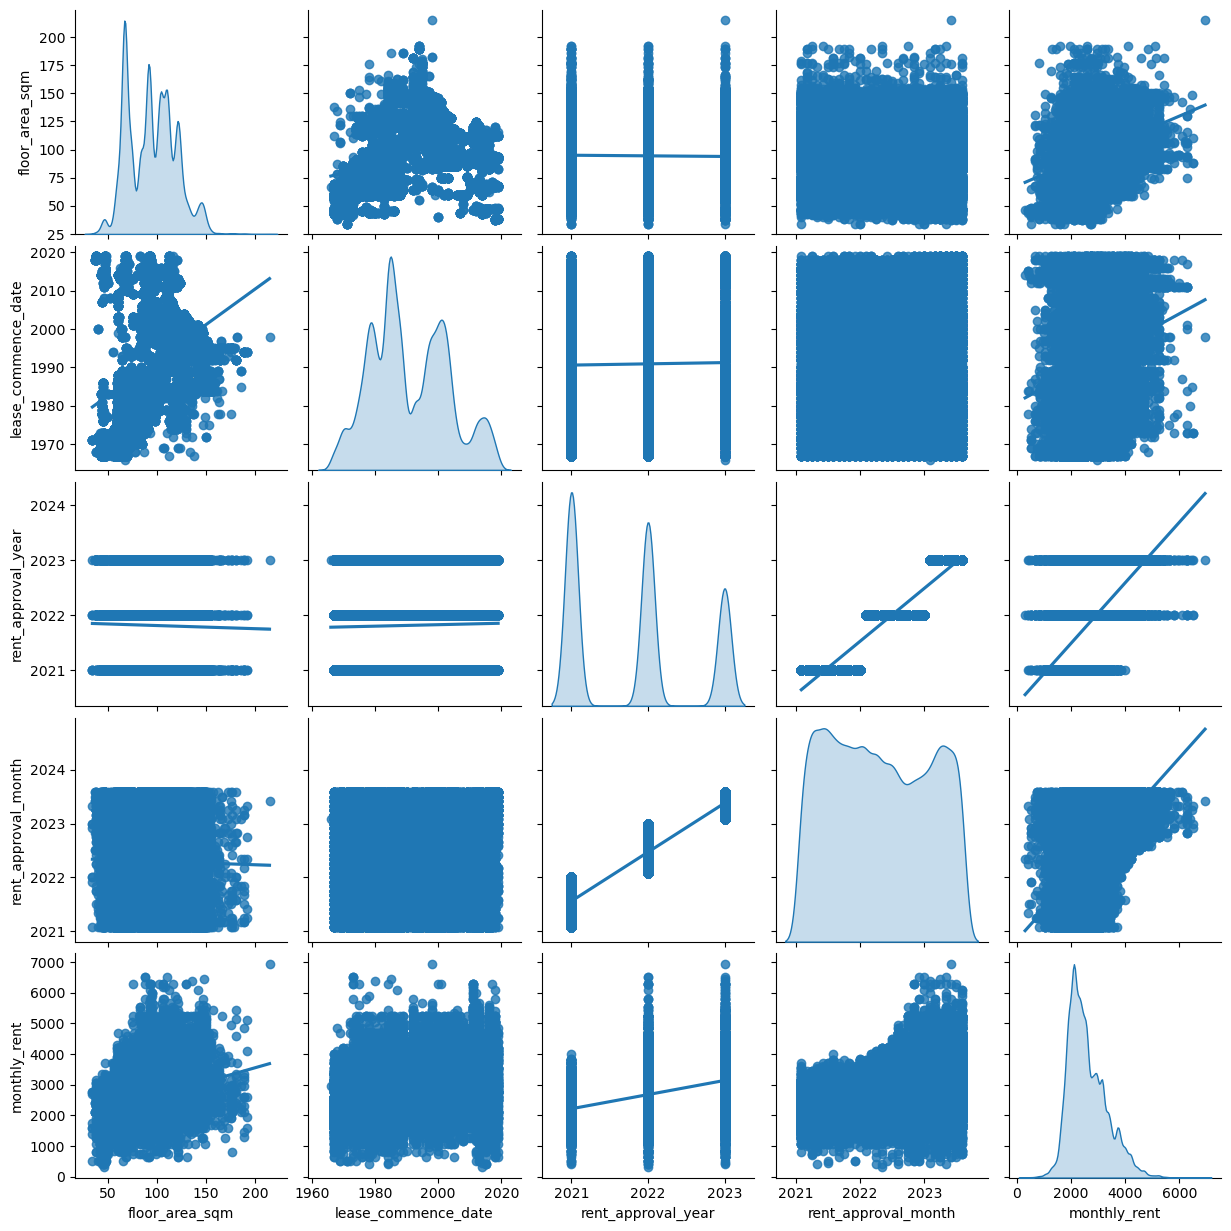

In [38]:
#draw corr distribution plot
sns.pairplot(df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']], diag_kind='kde', kind='reg')


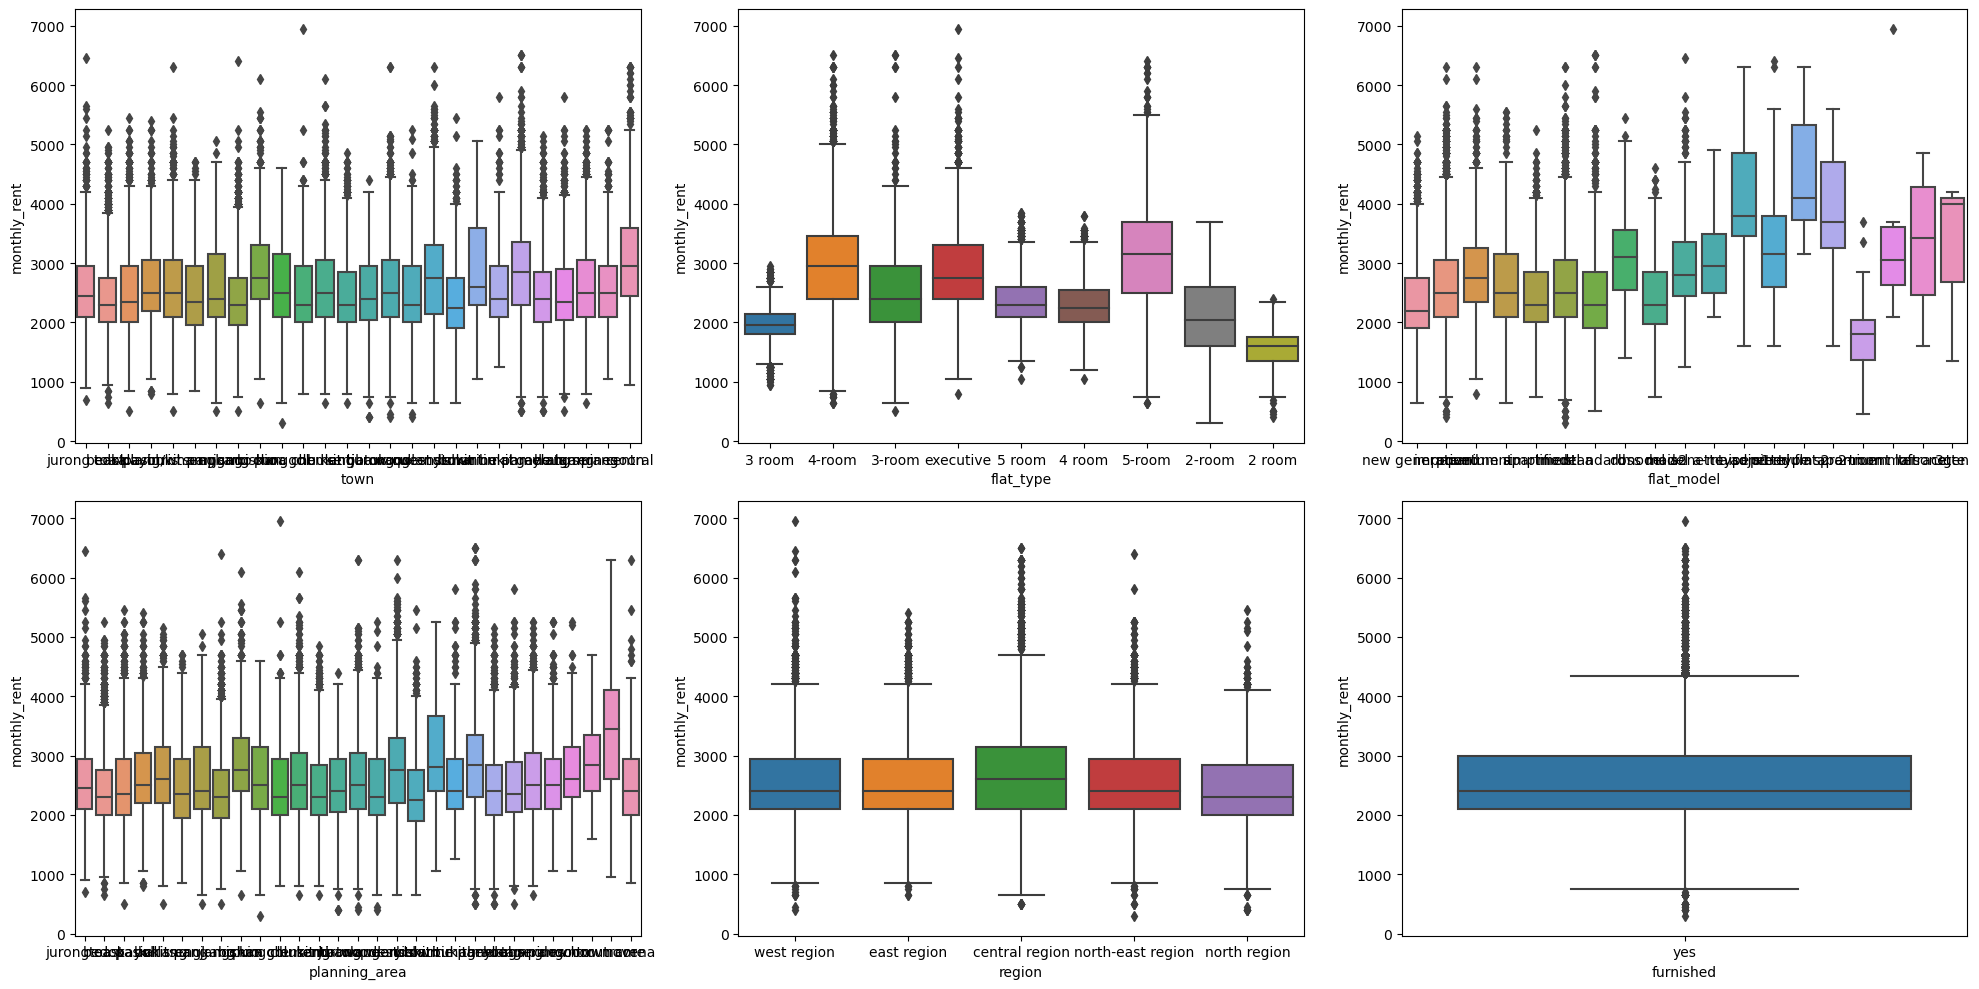

In [39]:
#draw distribution for categorical variables and monthly rent
#town	street_name	flat_type	flat_model	subzone	planning_area	region
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()



In [40]:
print(df_train['town'].unique())
print(df_train['flat_type'].unique())
print(df_train['flat_model'].unique())

['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
['3 room' '4-room' '3-room' 'executive' '5 room' '4 room' '5-room'
 '2-room' '2 room']
['new generation' 'improved' 'apartment' 'premium apartment' 'simplified'
 'model a' 'standard' 'dbss' 'model a2' 'maisonette' 'model a-maisonette'
 'type s1' 'adjoined flat' 'type s2' 'premium apartment loft' '2-room'
 'premium maisonette' 'terrace' '3gen']


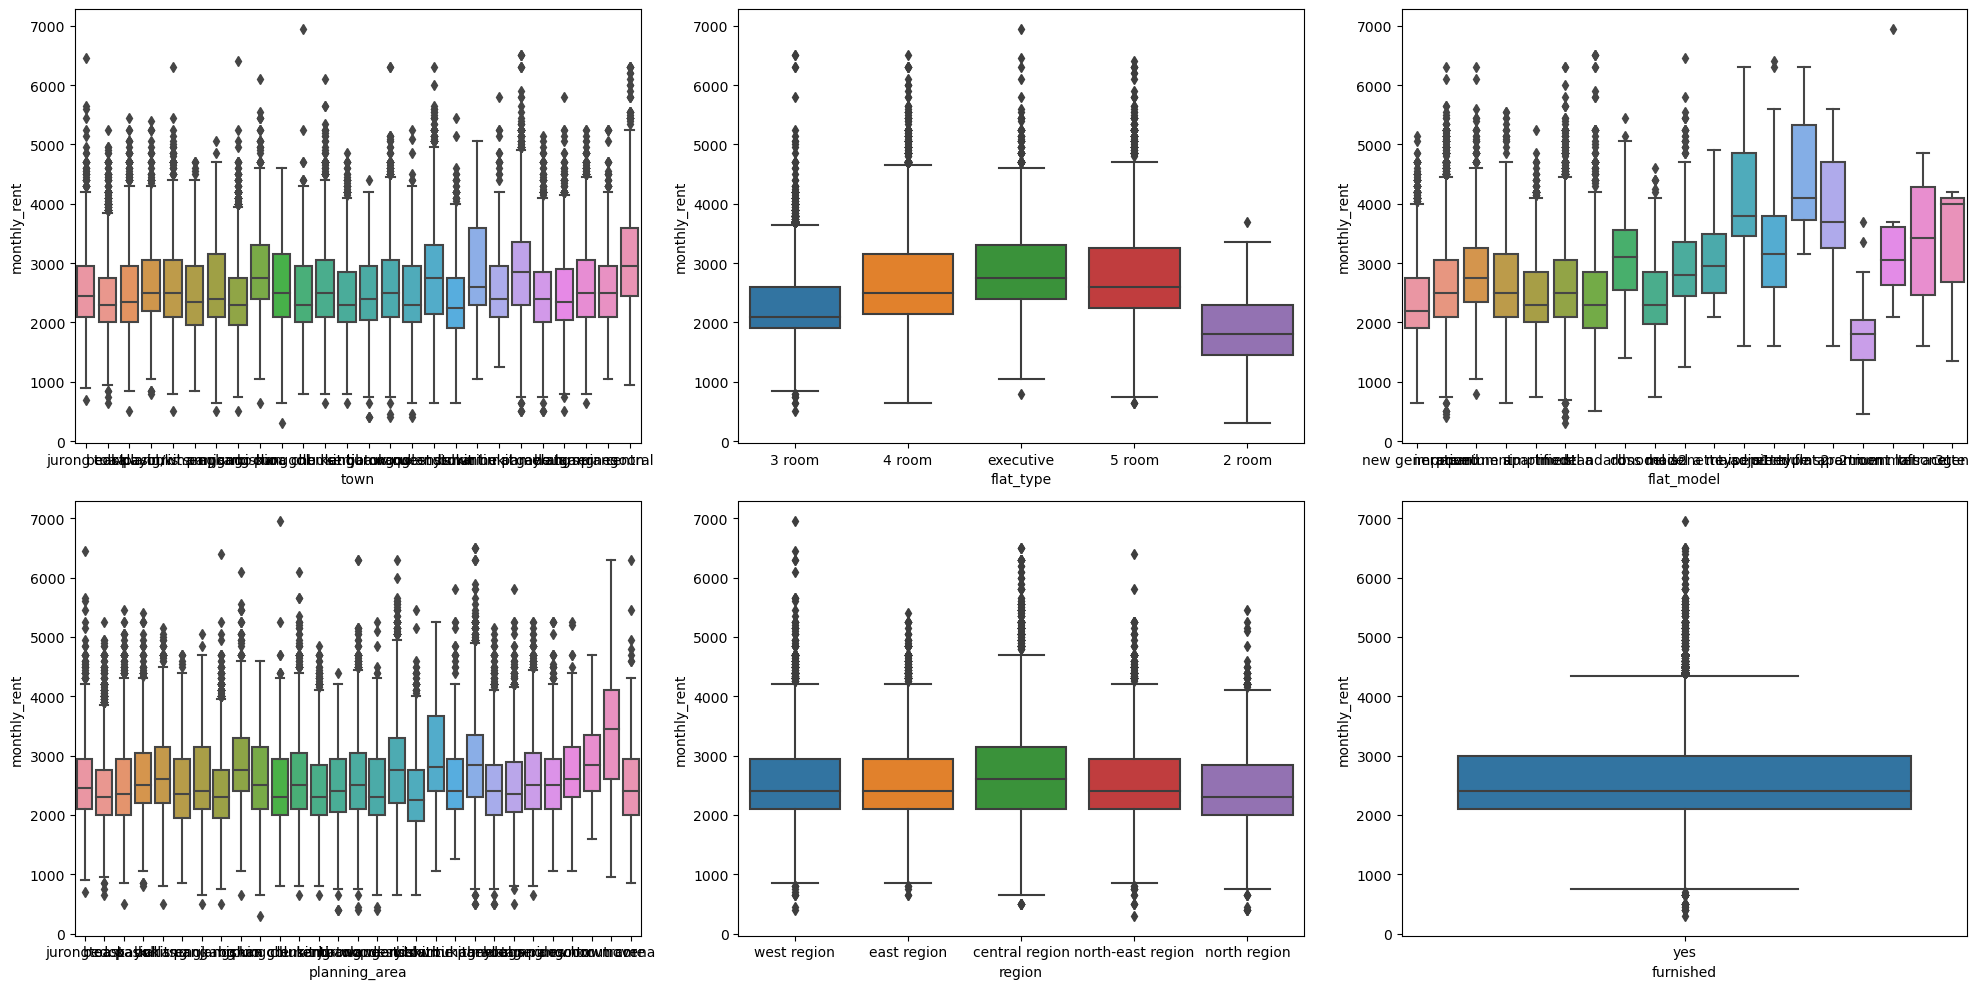

In [41]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')

#draw distribution for categorical variables and monthly rent
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()


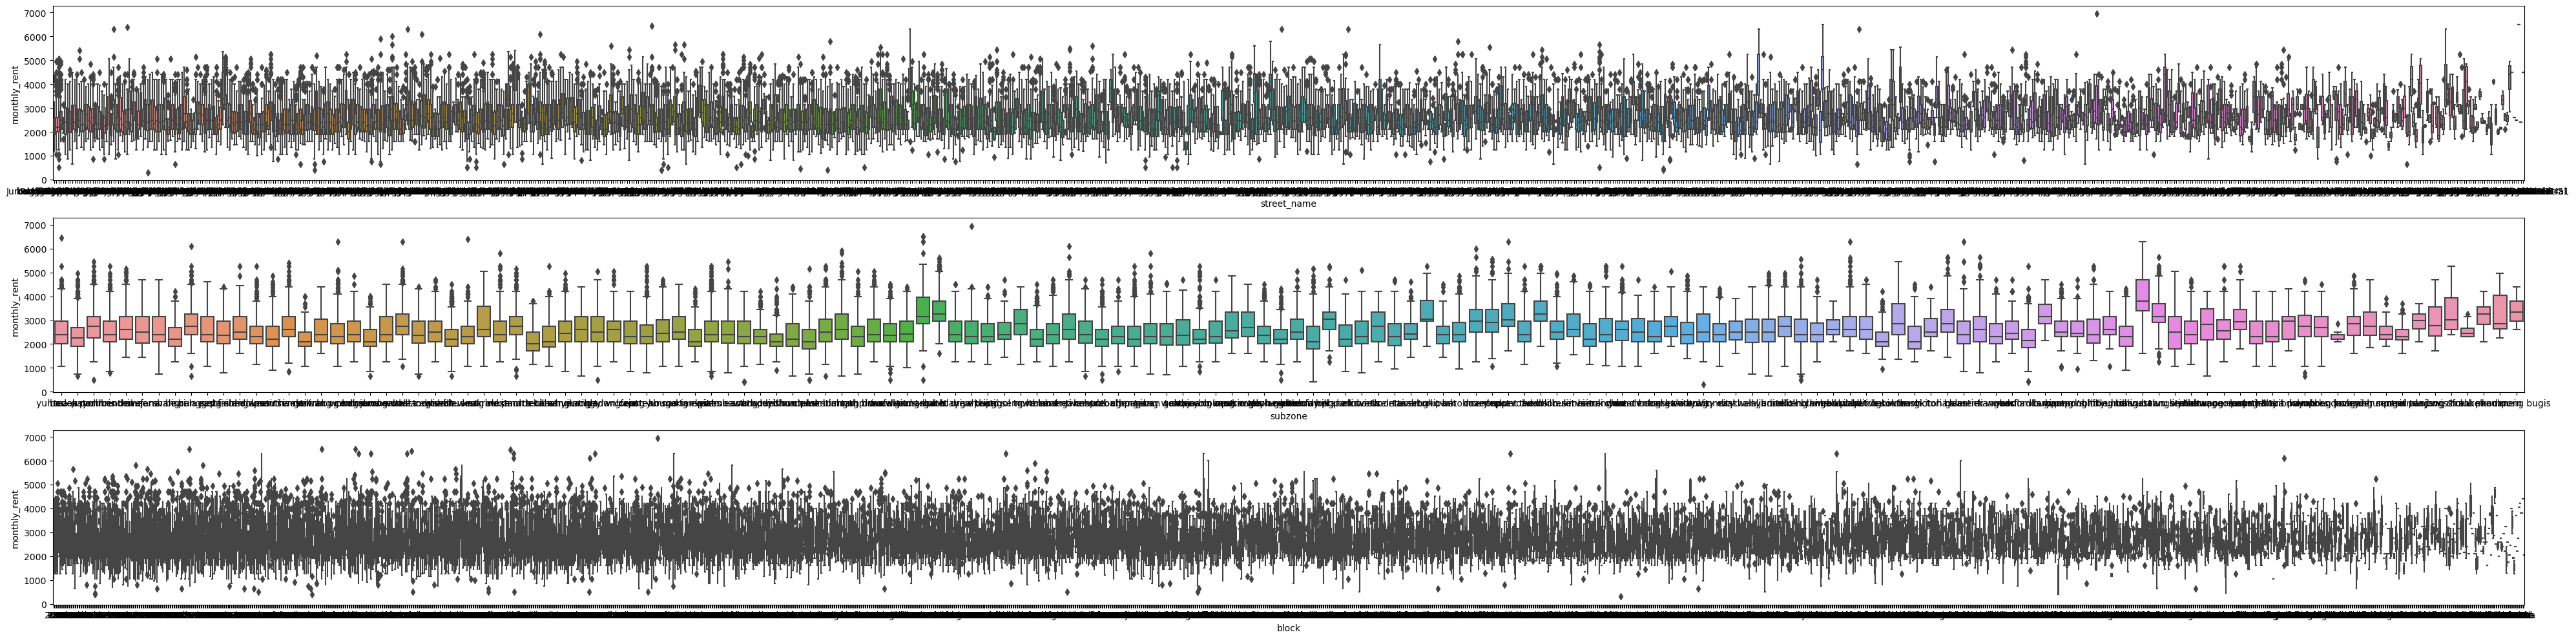

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
sns.boxplot(x='street_name', y='monthly_rent', data=df_train, ax=ax[0,])
sns.boxplot(x='subzone', y='monthly_rent', data=df_train, ax=ax[1,])
sns.boxplot(x='block', y='monthly_rent', data=df_train, ax=ax[2,])
plt.tight_layout()

In [43]:
#map all categorical variables to the mean of monthly rent
def category_map_mean(df_origin):
    df = df_origin.copy()
    #map town decrease order
    grouby_town = df_train.groupby('town')['monthly_rent'].mean()
    town_map = grouby_town.index
    town_map_dict = {town_map[i]: grouby_town[town_map[i]] for i in range(len(town_map))}
    df['town'] = df['town'].apply(lambda x: town_map_dict[x] if x in town_map_dict else -1)

    #map block decrease order
    grouby_block = df_train.groupby('block')['monthly_rent'].mean()
    block_map = grouby_block.index
    block_map_dict = {block_map[i]: grouby_block[block_map[i]] for i in range(len(block_map))}
    df['block'] = df['block'].apply(lambda x: block_map_dict[x] if x in block_map_dict else -1)

    #map flat_type decrease order
    grouby_flat_type = df_train.groupby('flat_type')['monthly_rent'].mean()
    flat_type_map = grouby_flat_type.index
    flat_type_map_dict = {flat_type_map[i]: grouby_flat_type[flat_type_map[i]] for i in range(len(flat_type_map))}
    df['flat_type'] = df['flat_type'].apply(lambda x: flat_type_map_dict[x] if x in flat_type_map_dict else -1)

    #map flat_model decrease order
    grouby_flat_model = df_train.groupby('flat_model')['monthly_rent'].mean()
    flat_model_map = grouby_flat_model.index
    flat_model_map_dict = {flat_model_map[i]: grouby_flat_model[flat_model_map[i]] for i in range(len(flat_model_map))}
    df['flat_model'] = df['flat_model'].apply(lambda x: flat_model_map_dict[x] if x in flat_model_map_dict else -1)

    #map planning_area decrease order
    grouby_planning_area = df_train.groupby('planning_area')['monthly_rent'].mean()
    planning_area_map = grouby_planning_area.index
    planning_area_map_dict = {planning_area_map[i]: grouby_planning_area[planning_area_map[i]] for i in range(len(planning_area_map))}
    df['planning_area'] = df['planning_area'].apply(lambda x: planning_area_map_dict[x] if x in planning_area_map_dict else -1)

    #map region decrease order
    grouby_region = df_train.groupby('region')['monthly_rent'].mean()
    region_map = grouby_region.index
    region_map_dict = {region_map[i]: grouby_region[region_map[i]] for i in range(len(region_map))}
    df['region'] = df['region'].apply(lambda x: region_map_dict[x] if x in region_map_dict else -1)

    #map street_name decrease order
    grouby_street_name = df_train.groupby('street_name')['monthly_rent'].mean()
    street_name_map = grouby_street_name.index
    street_name_map_dict = {street_name_map[i]: grouby_street_name[street_name_map[i]] for i in range(len(street_name_map))}
    df['street_name'] = df['street_name'].apply(lambda x: street_name_map_dict[x] if x in street_name_map_dict else -1)

    #map subzone decrease order
    grouby_subzone = df_train.groupby('subzone')['monthly_rent'].mean()
    subzone_map = grouby_subzone.index
    subzone_map_dict = {subzone_map[i]: grouby_subzone[subzone_map[i]] for i in range(len(subzone_map))}
    df['subzone'] = df['subzone'].apply(lambda x: subzone_map_dict[x] if x in subzone_map_dict else -1)

    #map rent_approval_date decrease order
    grouby_rent_approval_date = df_train.groupby('rent_approval_date')['monthly_rent'].mean()
    rent_approval_date_map = grouby_rent_approval_date.index
    rent_approval_date_map_dict = {rent_approval_date_map[i]: grouby_rent_approval_date[rent_approval_date_map[i]] for i in range(len(rent_approval_date_map))}
    df['rent_approval_date_mean'] = df['rent_approval_date'].apply(lambda x: rent_approval_date_map_dict[x] if x in rent_approval_date_map_dict else grouby_rent_approval_date.mean())

    
    

    return df

In [45]:
df_train_map_mean = category_map_mean(df_train)
df_train_map_mean.drop(['elevation'], axis=1, inplace=True)
df_train_map_mean.drop(['furnished'], axis=1, inplace=True)
df_train_map_mean.drop(['rent_approval_date'], axis=1, inplace=True)
df_train_map_mean

town        block  street_name    flat_type   flat_model  \
0      2595.146199  2464.285714  2282.692308  2276.033233  2369.965462   
1      2438.227223  2357.720588  2384.124088  2692.359176  2369.965462   
2      2516.680515  2428.873239  2402.484472  2276.033233  2636.211052   
3      2686.857477  2375.714286  2691.237113  2892.857143  2878.725962   
4      2665.537634  2470.681818  2261.363636  2276.033233  2636.211052   
...            ...          ...          ...          ...          ...   
59995  2416.700057  2505.714286  2368.501529  2276.033233  2369.965462   
59996  2904.113924  3850.000000  3512.500000  2692.359176  2612.031305   
59997  2638.489123  2900.000000  2552.564103  2815.593875  2636.211052   
59998  2438.227223  2566.981132  2570.967742  2815.593875  2444.223986   
59999  2416.700057  2360.714286  2368.501529  2276.033233  2369.965462   

       floor_area_sqm  lease_commence_date  latitude   longitude      subzone  \
0                67.0                 1983  1.344518  103.738630  2542.158516   
1                92.0                 1978  1.330186  103.938717  2360.371046   
2                67.0                 1971  1.332242  103.845643  2808.893871   
3               149.0                 1993  1.370239  103.962894  2610.338573   
4                68.0                 1972  1.320502  103.863341  2793.525180   
...               ...                  ...       ...         ...          ...   
59995            67.0                 1979  1.366050  103.854168  2390.887097   
59996            83.0                 2019  1.286493  103.821434  2694.936709   
59997           122.0                 1988  1.355064  103.936507  2602.823315   
59998           123.0                 1977  1.318974  103.944076  2434.379786   
59999            67.0                 1979  1.366980  103.855718  2390.887097   

       planning_area       region  monthly_rent  rent_approval_year  \
0        2595.146199  2569.167537          1600                2021   
1        2438.227223  2570.667785          2250                2022   
2        2516.680515  2737.201353          1900                2022   
3        2686.857477  2570.667785          2850                2021   
4        2702.635659  2737.201353          2100                2022   
...              ...          ...           ...                 ...   
59995    2416.700057  2558.822710          2200                2021   
59996    2904.113924  2737.201353          4100                2023   
59997    2638.489123  2570.667785          2250                2022   
59998    2438.227223  2570.667785          4700                2023   
59999    2416.700057  2558.822710          2850                2023   

       rent_approval_month  rent_approval_date_mean  
0              2021.750000              2233.926780  
1              2022.416667              2517.128874  
2              2022.833333              2928.483245  
3              2021.666667              2249.901768  
4              2022.916667              2986.739659  
...                    ...                      ...  
59995          2021.750000              2233.926780  
59996          2023.333333              3178.128128  
59997          2022.500000              2582.606383  
59998          2023.083333              3069.581639  
59999          2023.166667              3103.949406  

[60000 rows x 16 columns]

In [135]:
#add KNN feature
from sklearn.neighbors import KNeighborsRegressor

KNN_X = df_train[['latitude', 'longitude']]
KNN_X['latitude'] *= 2
KNN_y = df_train['monthly_rent']

KNN_model = KNeighborsRegressor(n_neighbors=16)
KNN_model.fit(KNN_X, KNN_y)

def add_KNN_feature(df_origin):
    predict_X = df_origin[['latitude', 'longitude']]
    predict_X['latitude'] *= 2
    predict_y = KNN_model.predict(predict_X)
    df = df_origin.copy()
    df['KNN_feature'] = predict_y
    return df

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_39076\3928969618.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
df_train_map_mean_KNN = add_KNN_feature(df_train_map_mean)
df_train_map_mean_KNN

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_39076\1203423300.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



town        block  street_name    flat_type   flat_model  \
0      2595.146199  2464.285714  2282.692308  2276.033233  2369.965462   
1      2438.227223  2357.720588  2384.124088  2692.359176  2369.965462   
2      2516.680515  2428.873239  2402.484472  2276.033233  2636.211052   
3      2686.857477  2375.714286  2691.237113  2892.857143  2878.725962   
4      2665.537634  2470.681818  2261.363636  2276.033233  2636.211052   
...            ...          ...          ...          ...          ...   
59995  2416.700057  2505.714286  2368.501529  2276.033233  2369.965462   
59996  2904.113924  3850.000000  3512.500000  2692.359176  2612.031305   
59997  2638.489123  2900.000000  2552.564103  2815.593875  2636.211052   
59998  2438.227223  2566.981132  2570.967742  2815.593875  2444.223986   
59999  2416.700057  2360.714286  2368.501529  2276.033233  2369.965462   

       floor_area_sqm  lease_commence_date  latitude   longitude      subzone  \
0                67.0                 1983  1.344518  103.738630  2542.158516   
1                92.0                 1978  1.330186  103.938717  2360.371046   
2                67.0                 1971  1.332242  103.845643  2808.893871   
3               149.0                 1993  1.370239  103.962894  2610.338573   
4                68.0                 1972  1.320502  103.863341  2793.525180   
...               ...                  ...       ...         ...          ...   
59995            67.0                 1979  1.366050  103.854168  2390.887097   
59996            83.0                 2019  1.286493  103.821434  2694.936709   
59997           122.0                 1988  1.355064  103.936507  2602.823315   
59998           123.0                 1977  1.318974  103.944076  2434.379786   
59999            67.0                 1979  1.366980  103.855718  2390.887097   

       planning_area       region  monthly_rent  rent_approval_year  \
0        2595.146199  2569.167537          1600                2021   
1        2438.227223  2570.667785          2250                2022   
2        2516.680515  2737.201353          1900                2022   
3        2686.857477  2570.667785          2850                2021   
4        2702.635659  2737.201353          2100                2022   
...              ...          ...           ...                 ...   
59995    2416.700057  2558.822710          2200                2021   
59996    2904.113924  2737.201353          4100                2023   
59997    2638.489123  2570.667785          2250                2022   
59998    2438.227223  2570.667785          4700                2023   
59999    2416.700057  2558.822710          2850                2023   

       rent_approval_month  rent_approval_date_mean  KNN_feature  
0              2021.750000              2233.926780   2264.84375  
1              2022.416667              2517.128874   2447.65625  
2              2022.833333              2928.483245   2466.40625  
3              2021.666667              2249.901768   2796.09375  
4              2022.916667              2986.739659   2520.31250  
...                    ...                      ...          ...  
59995          2021.750000              2233.926780   2470.31250  
59996          2023.333333              3178.128128   2929.68750  
59997          2022.500000              2582.606383   2746.09375  
59998          2023.083333              3069.581639   2548.43750  
59999          2023.166667              3103.949406   2288.28125  

[60000 rows x 17 columns]

Index(['town', 'block', 'street_name', 'flat_type', 'flat_model',
       'floor_area_sqm', 'lease_commence_date', 'latitude', 'longitude',
       'subzone', 'planning_area', 'region', 'monthly_rent',
       'rent_approval_year', 'rent_approval_month', 'rent_approval_date_mean',
       'KNN_feature'],
      dtype='object')

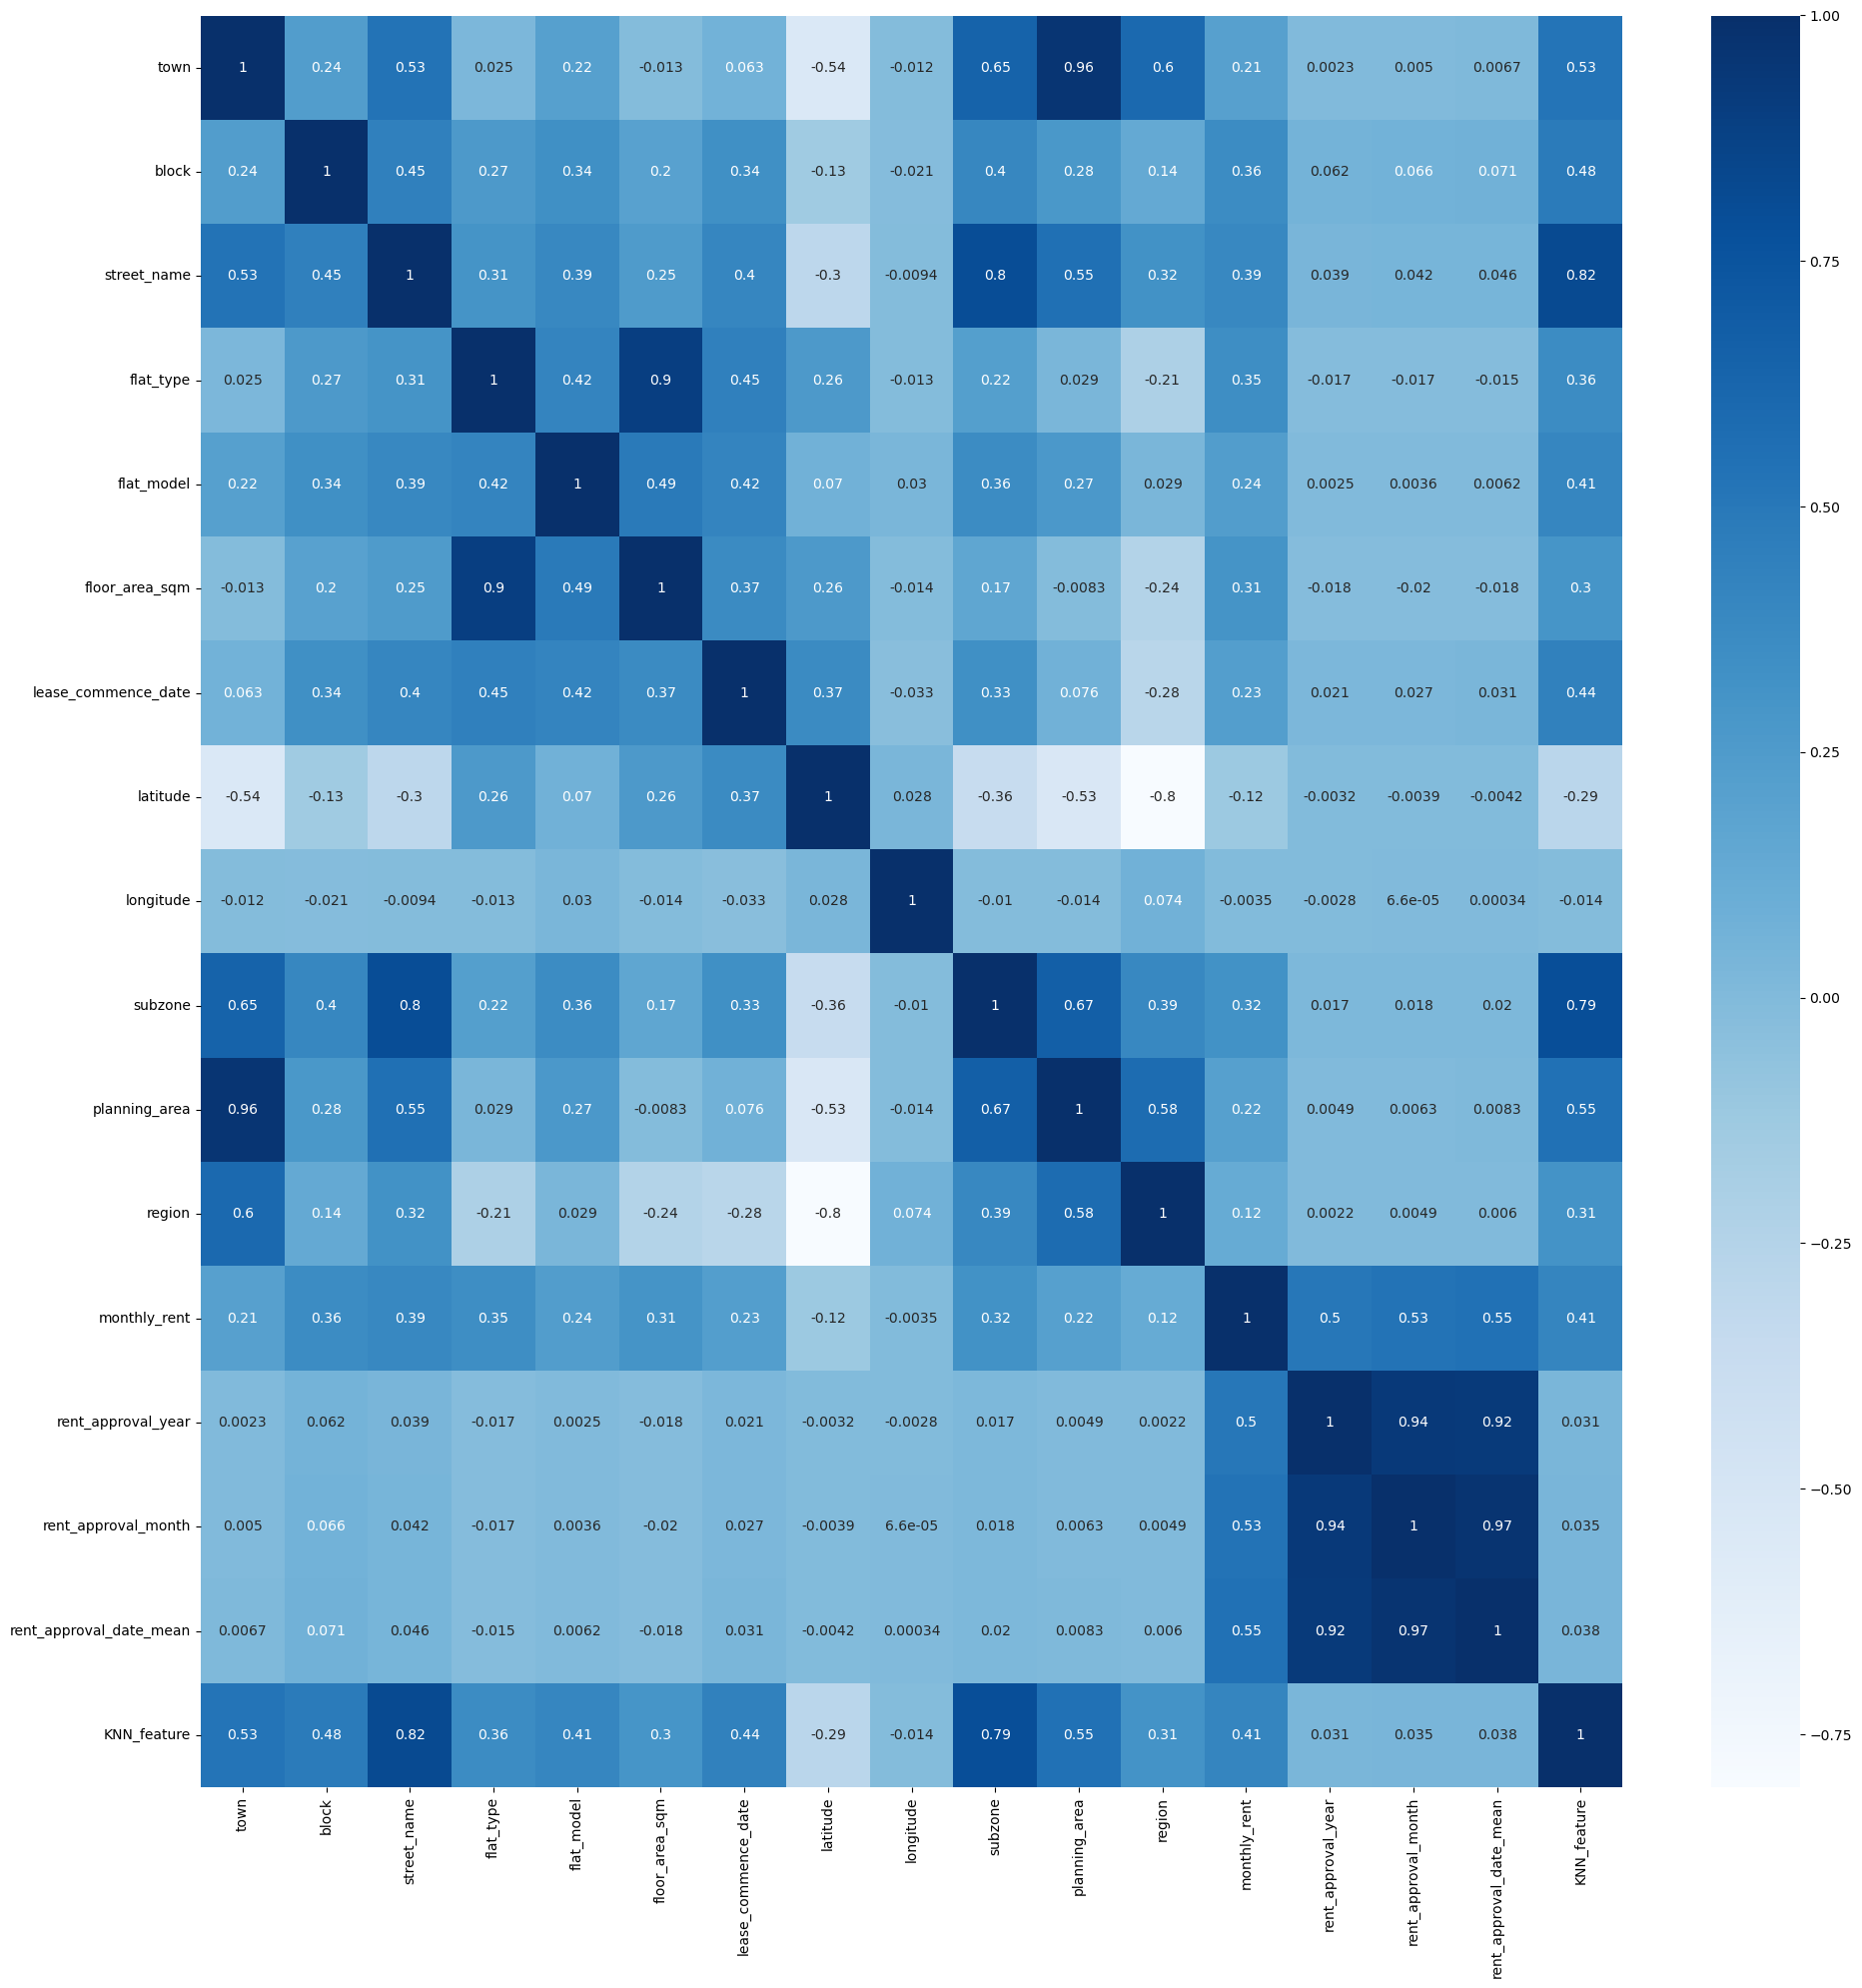

In [97]:
plt.figure(figsize=(20, 20))
corr = df_train_map_mean_KNN.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
df_train_map_mean_KNN.columns

In [63]:
#draw latitude and longitude on map
import nbformat
print(nbformat.__version__)
fig = px.scatter_geo(df_train_map_mean[:10000], lat='latitude', lon='longitude', color='monthly_rent', hover_name='block', projection='natural earth')
fig.show()


5.9.2


## try with attributes with KNN_feature
* block
* street_name
* flat_type
* floor_area_sqm
* subzone
* rent_approval_date_mean
* KNN_feature
* price
## with method
* xgboost
* lgbm

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [151]:
def data_preprocess(df):
    df = df.copy()
    df_coe = pd.read_csv(path_prefix + 'auxiliary-data/auxiliary-data/sg-coe-prices.csv')
    month_to_numeric = {
        'january': 1,
        'february': 2,
        'march': 3,
        'april': 4,
        'may': 5,
        'june': 6,
        'july': 7,
        'august': 8,
        'september': 9,
        'october': 10,
        'november': 11,
        'december': 12
    }

    df_coe['month'] = df_coe['month'].apply(lambda x: month_to_numeric[x.lower()])
    df_coe['month'] = df_coe['month'].apply(lambda x: f'{x:02d}')

    df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
    df_coe = df_coe[['date', 'price']]
    avg_price_bids_quota = df_coe.groupby('date').mean().reset_index()

    df['price'] = df['rent_approval_date'].apply(lambda x: avg_price_bids_quota[avg_price_bids_quota['date'] == x]['price'].values[0])

    df['flat_type'] = df['flat_type'].str.replace('-', ' ')
    df = category_map_mean(df)
    df.drop(['elevation'], axis=1, inplace=True)
    df.drop(['furnished'], axis=1, inplace=True)
    df = add_KNN_feature(df)
    df.drop(['latitude'], axis=1, inplace=True)
    df.drop(['longitude'], axis=1, inplace=True)
    df['rent_date'] = pd.to_datetime(df['rent_approval_date']).dt.year + pd.to_datetime(df['rent_approval_date']).dt.month/12
    df.drop(['rent_approval_date'], axis=1, inplace=True)
    
    df = df[['block', 'street_name', 'flat_type', 'town', 'floor_area_sqm', 'planning_area','subzone', 'rent_approval_date_mean', 'KNN_feature', 'rent_date']]

    return df

In [137]:
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [138]:
df_train

rent_approval_date             town block            street_name  \
0                2021-09      jurong east   257  Jurong East Street 24   
1                2022-05            bedok   119       bedok north road   
2                2022-10        toa payoh   157     lorong 1 toa payoh   
3                2021-08        pasir ris   250    Pasir Ris Street 21   
4                2022-11  kallang/whampoa    34           Whampoa West   
...                  ...              ...   ...                    ...   
59995            2021-09       ang mo kio   441   Ang Mo Kio Avenue 10   
59996            2023-04      bukit merah   95a         henderson road   
59997            2022-06         tampines  862a     tampines street 83   
59998            2023-01            bedok    67     Bedok Sth Avenue 3   
59999            2023-02       ang mo kio   445   Ang Mo Kio Avenue 10   

       flat_type      flat_model  floor_area_sqm furnished  \
0         3 room  new generation            67.0       yes   
1         4-room  new generation            92.0       yes   
2         3-room        improved            67.0       yes   
3      executive       apartment           149.0       yes   
4         3-room        improved            68.0       yes   
...          ...             ...             ...       ...   
59995     3 room  new generation            67.0       yes   
59996     4-room         model a            83.0       yes   
59997     5-room        improved           122.0       yes   
59998     5-room        standard           123.0       yes   
59999     3-room  new generation            67.0       yes   

       lease_commence_date  latitude   longitude  elevation  \
0                     1983  1.344518  103.738630        0.0   
1                     1978  1.330186  103.938717        0.0   
2                     1971  1.332242  103.845643        0.0   
3                     1993  1.370239  103.962894        0.0   
4                     1972  1.320502  103.863341        0.0   
...                    ...       ...         ...        ...   
59995                 1979  1.366050  103.854168        0.0   
59996                 2019  1.286493  103.821434        0.0   
59997                 1988  1.355064  103.936507        0.0   
59998                 1977  1.318974  103.944076        0.0   
59999                 1979  1.366980  103.855718        0.0   

                 subzone planning_area             region  monthly_rent  
0             yuhua east   jurong east        west region          1600  
1            bedok north         bedok        east region          2250  
2      toa payoh central     toa payoh     central region          1900  
3        pasir ris drive     pasir ris        east region          2850  
4              bendemeer       kallang     central region          2100  
...                  ...           ...                ...           ...  
59995         chong boon    ang mo kio  north-east region          2200  
59996     henderson hill   bukit merah     central region          4100  
59997      tampines west      tampines        east region          2250  
59998        bedok south         bedok        east region          4700  
59999         chong boon    ang mo kio  north-east region          2850  

[60000 rows x 16 columns]

In [101]:
#count test data has block in train data
df_train_block = df_train['block'].unique()
print(len(df_train_block))
df_test_block = df_test['block']
count = 0
for i in range(len(df_test_block)):
    if df_test_block[i] in df_train_block:
        count += 1
print(count)

2553
29921


In [139]:
df_train_X = data_preprocess(df_train)
#df_train_X = df_train_X.drop(['monthly_rent'], axis=1)
df_train_y = df_train['monthly_rent']
df_test_X = data_preprocess(df_test)
df_test_X

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_39076\3928969618.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_39076\3928969618.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



block  rent_approval_date_mean  KNN_feature    rent_date
0      2625.000000              3069.581639     2353.125  2023.083333
1      2522.916667              2812.587413     2471.875  2022.750000
2      2700.000000              3262.248898     2831.250  2023.583333
3      2515.333333              2249.901768     2562.500  2021.666667
4      2610.215054              2449.322430     2150.000  2022.250000
...            ...                      ...          ...          ...
29995  2766.666667              2755.309735     2618.750  2022.666667
29996  2178.947368              3103.949406     2118.750  2023.166667
29997  2464.035088              3189.212679     2262.500  2023.416667
29998  2946.153846              3103.949406     2665.625  2023.166667
29999  2655.405405              3189.212679     2775.000  2023.416667

[30000 rows x 4 columns]

In [140]:
df_train_X

block  rent_approval_date_mean  KNN_feature    rent_date
0      2464.285714              2233.926780     2075.000  2021.750000
1      2357.720588              2517.128874     2465.625  2022.416667
2      2428.873239              2928.483245     2262.500  2022.833333
3      2375.714286              2249.901768     2834.375  2021.666667
4      2470.681818              2986.739659     2346.875  2022.916667
...            ...                      ...          ...          ...
59995  2505.714286              2233.926780     2459.375  2021.750000
59996  3850.000000              3178.128128     3493.750  2023.333333
59997  2900.000000              2582.606383     2675.000  2022.500000
59998  2566.981132              3069.581639     2715.625  2023.083333
59999  2360.714286              3103.949406     2346.875  2023.166667

[60000 rows x 4 columns]

In [75]:
from scipy import stats

z_scores = stats.zscore(df_train_X)

threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
print(len(outlier_indices))

df_train_X = df_train_X.drop(outlier_indices)
df_train_y = df_train_y.drop(outlier_indices)

df_train_X.reset_index(drop=True, inplace=True)
df_train_y.reset_index(drop=True, inplace=True)

print(df_train_X)

5125
             block  street_name    flat_type         town  floor_area_sqm  \
0      2464.285714  2282.692308  1974.144364  2595.146199            67.0   
1      2357.720588  2384.124088  2302.270969  2438.227223            92.0   
2      2428.873239  2402.484472  1974.144364  2516.680515            67.0   
3      2375.714286  2691.237113  2892.857143  2686.857477           149.0   
4      2470.681818  2261.363636  1974.144364  2665.537634            68.0   
...            ...          ...          ...          ...             ...   
56955  2393.181818  2569.047619  1974.144364  2484.265734            68.0   
56956  2505.714286  2368.501529  1974.144364  2416.700057            67.0   
56957  2900.000000  2552.564103  2400.673617  2638.489123           122.0   
56958  2566.981132  2570.967742  2400.673617  2438.227223           123.0   
56959  2360.714286  2368.501529  1974.144364  2416.700057            67.0   

       planning_area      subzone  rent_approval_date_mean      price 

In [141]:
import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [142]:
#cut 30% data as validation set
X_train, X_val, y_train, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=19260817)

MAE:  371.70082394070096
RMSE:  487.94342243830937


<Axes: >

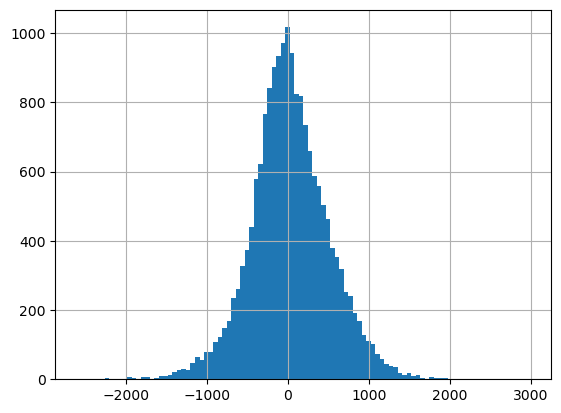

In [148]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(
    n_estimators=500, 
    learning_rate=0.01,
    )
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_39076\3547464200.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Concyclics\AppData\Local\Temp\ipykernel_39076\3547464200.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




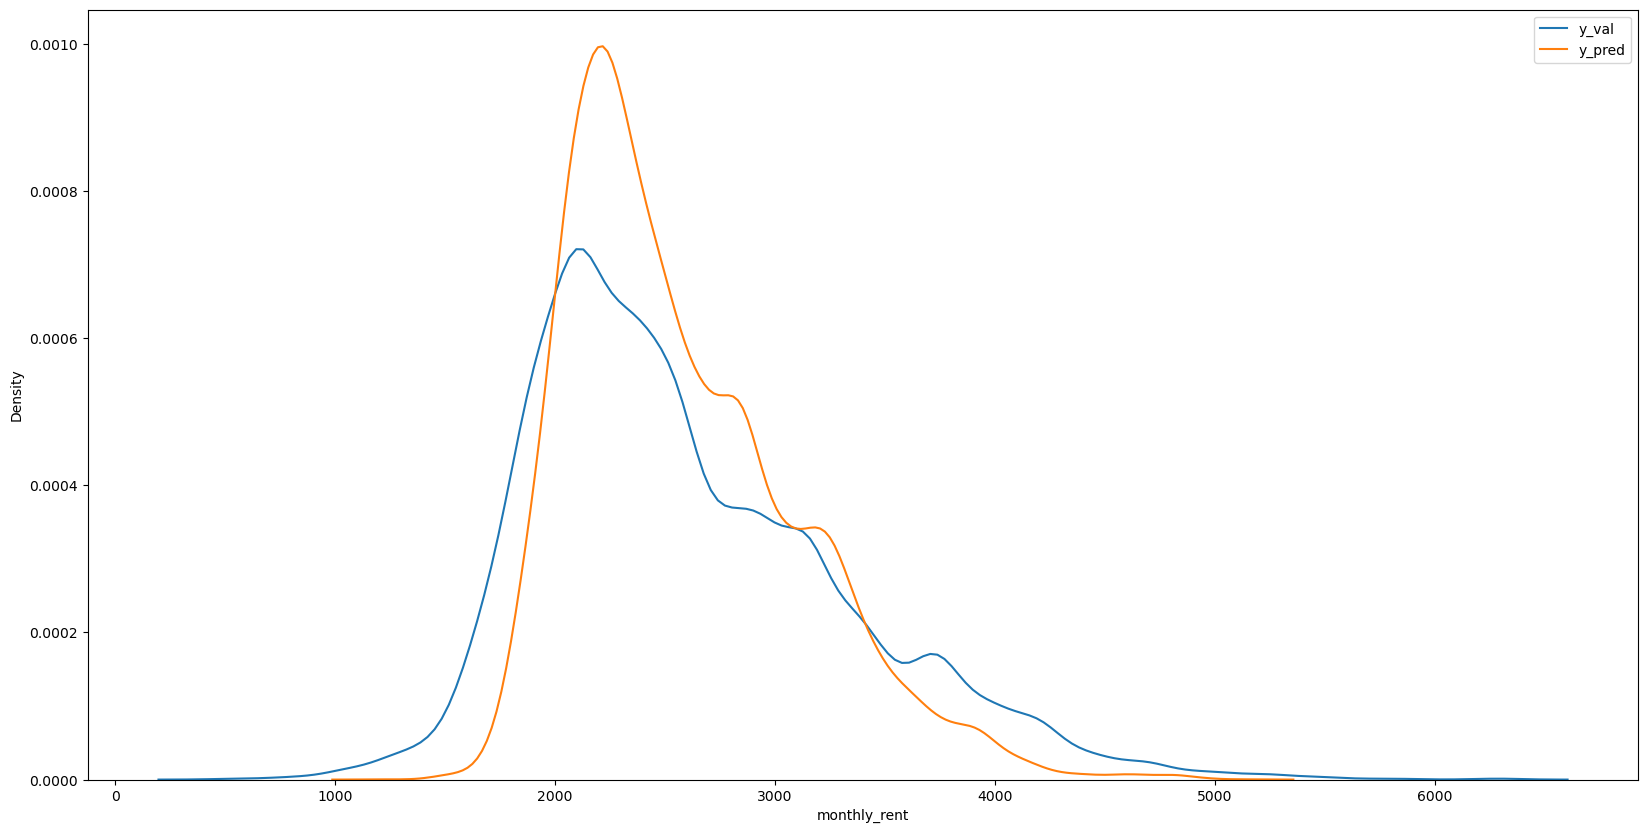

In [149]:
#plot distribution from predcit and real
plt.figure(figsize=(20, 10))
sns.distplot(y_val, hist=False, label='y_val')
sns.distplot(y_pred, hist=False, label='y_pred')
plt.legend()
plt.show()

In [150]:
#make submission
xgb_regressor = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    )

xgb_regressor.fit(df_train_X, df_train_y)


submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = xgb_regressor.predict(df_test_X)

submission.to_csv('submission.csv', index=False)

MAE:  378.9343635802469
RMSE:  503.19585697199653


<Axes: >

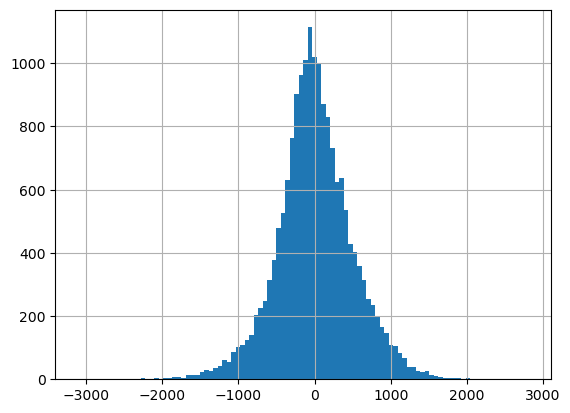

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = DecisionTreeRegressor()
model = RandomForestRegressor()
#model = GradientBoostingRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 10
[LightGBM] [Info] Start training from score 2586.378571
LGBM MAE:  362.2496009382918
LGBM RMSE:  473.8726676024341


<Axes: >

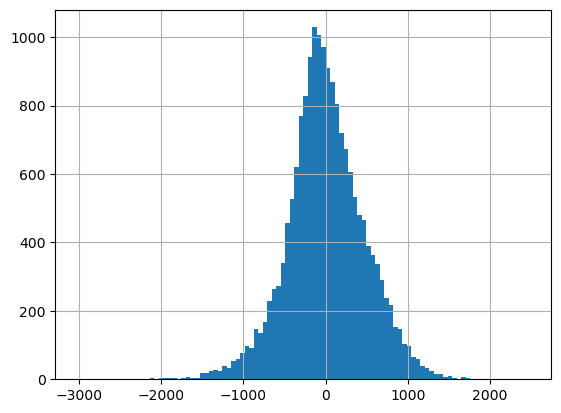

In [133]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=500,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)



In [134]:
#submit with LGBM
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=500,
)

LGBM.fit(df_train_X, df_train_y)

submission = pd.read_csv(path_prefix + 'example-submission.csv')
submission['Predicted'] = LGBM.predict(df_test_X)

submission.to_csv('submission.csv', index=False)



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 10
[LightGBM] [Info] Start training from score 2590.328333


In [ ]:
#feature importance
lgb_model = LGBMRegressor()
features = X_train.columns
dict_feature_importance = {}

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_val)

original_rmse = mean_squared_error(y_val, y_pred, squared=False)

for feature in features:
    X_train_tmp = X_train.drop([feature], axis=1)
    X_val_tmp = X_val.drop([feature], axis=1)
    lgb_model.fit(X_train_tmp, y_train)
    y_pred = lgb_model.predict(X_val_tmp)
    dict_feature_importance[feature] = mean_squared_error(y_val, y_pred, squared=False) - original_rmse


In [ ]:
for feature in features:
    print(feature, '\t\t', dict_feature_importance[feature])

block 		 6.781290413628653
street_name 		 3.2325207099596582
flat_type 		 0.8867685255146398
floor_area_sqm 		 0.10900175724748351
subzone 		 4.340516944205319
rent_approval_date_mean 		 -0.10558833569683657
adjusted_close 		 -0.4333536304993686
price 		 -0.13245692856355618


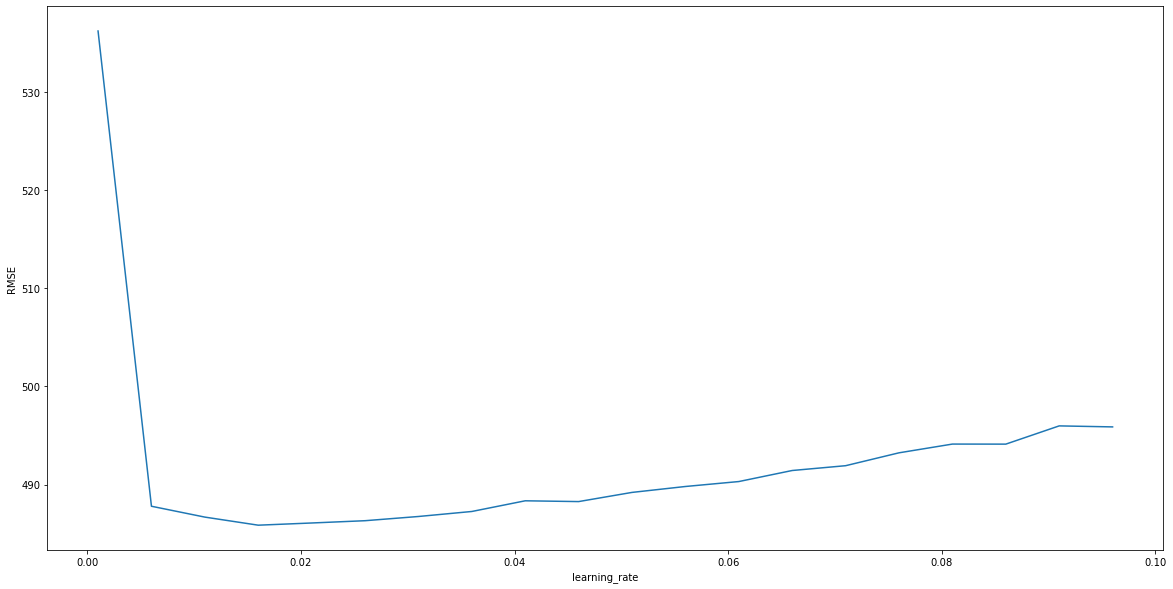

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.1, 0.005))
LGBM_RMSE_list = []
for learning_rate in learning_rate_list:
    LGBM = LGBMRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(learning_rate_list, LGBM_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [ ]:
print(learning_rate_list)
print(LGBM_RMSE_list)

[0.001, 0.006, 0.011, 0.016, 0.021, 0.026000000000000002, 0.031, 0.036000000000000004, 0.041, 0.046, 0.051000000000000004, 0.056, 0.061, 0.066, 0.07100000000000001, 0.076, 0.081, 0.08600000000000001, 0.091, 0.096]
[505.1465763362904, 492.54442895346574, 489.5115007436877, 488.12749381424715, 487.234967598313, 486.43030080137646, 486.5828965446134, 486.6669251273495, 486.63124548097124, 486.7582304233197, 486.6311661213862, 486.47709292086125, 486.510545132065, 486.4096140437656, 486.5259098679828, 486.6720949618832, 486.42651059255394, 486.4040339790541, 486.4040339790541]


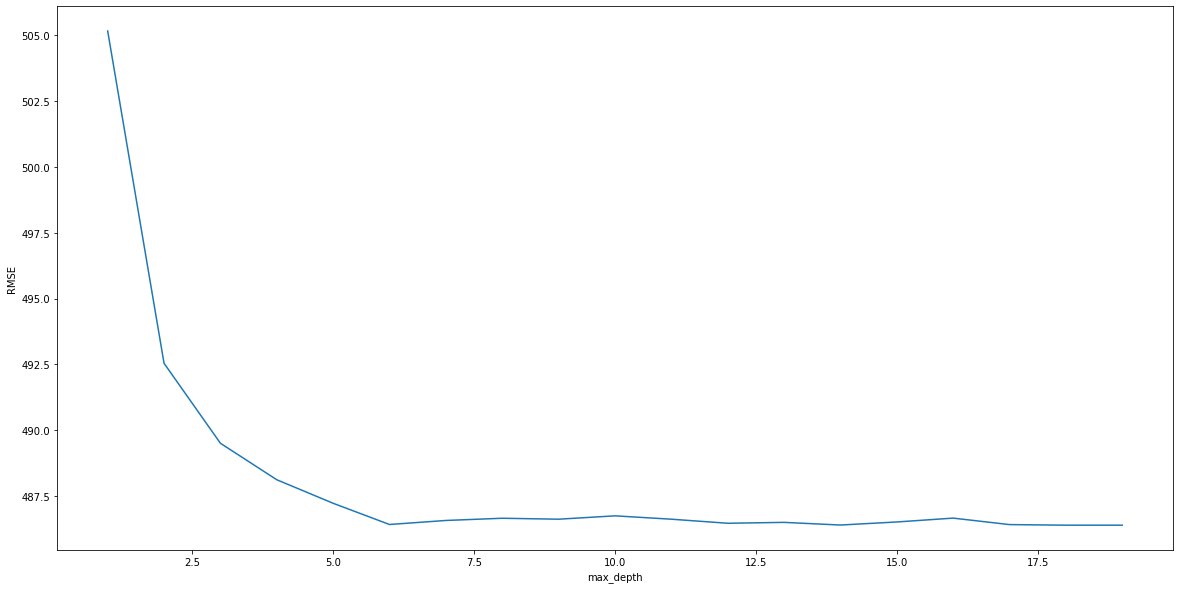

In [ ]:
#tuning with different depth
max_depth_list = list(np.arange(1, 20, 1))
LGBM_RMSE_list = []
for max_depth in max_depth_list:
    LGBM = LGBMRegressor(
        learning_rate=0.01,
        n_estimators=1000,
        max_depth=max_depth
    )

    LGBM.fit(X_train, y_train)
    y_pred = LGBM.predict(X_val)
    LGBM_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.figure(figsize=(20, 10))
plt.plot(max_depth_list, LGBM_RMSE_list)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [ ]:
#tuning parameters with grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': list(np.arange(1, 20, 1)),
    'num_leaves': list(np.arange(2, 100, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))


Fitting 5 folds for each of 1862 candidates, totalling 9310 fits
参数的最佳取值:{'max_depth': 8, 'num_leaves': 99}
最佳模型得分:-525.6642401884303


In [ ]:
param_grid = {
    'min_child_samples': list(np.arange(1, 100, 1)),
    'min_child_weight': list(np.arange(0.001, 0.1, 0.001)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=grid_search.best_params_['max_depth'],
    num_leaves=grid_search.best_params_['num_leaves'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

Fitting 5 folds for each of 9801 candidates, totalling 49005 fits


KeyboardInterrupt: 

In [ ]:
param_grid = {
    'bagging_fraction': list(np.arange(0.5, 1, 0.1)),
    'bagging_freq': list(np.arange(2, 10, 1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=grid_search.best_params_['min_child_samples'],
    min_child_weight=grid_search.best_params_['min_child_weight'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

In [ ]:
param_grid = {
    'reg_alpha': list(np.arange(0, 1, 0.1)),
    'reg_lambda': list(np.arange(0, 1, 0.1)),
}

LGBM = LGBMRegressor(
    learning_rate=0.01,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=grid_search.best_params_['bagging_fraction'],
    bagging_freq=grid_search.best_params_['bagging_freq'],
)

#RSME as the metric
grid_search = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))

In [ ]:
LGBM = LGBMRegressor(
    learning_rate=0.01,
    n_estimators=50000,
    max_depth=9,
    num_leaves=99,
    min_child_samples=27,
    min_child_weight=0.001,
    bagging_fraction=0.5,
    bagging_freq=2,
    reg_alpha=grid_search.best_params_['reg_alpha'],
    reg_lambda=grid_search.best_params_['reg_lambda'],
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_val)
print('LGBM MAE: ', mean_absolute_error(y_val, y_pred))
print('LGBM RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [ ]:
xgb = XGBRegressor(
    learning_rate=0.01,
    n_estimators=1000,
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print('XGB MAE: ', mean_absolute_error(y_val, y_pred))
print('XGB RMSE: ', np.sqrt(mean_squared_error(y_val, y_pred)))
df_plot_diff = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
df_plot_diff['diff'] = df_plot_diff['y_val'] - df_plot_diff['y_pred']
df_plot_diff['diff'].hist(bins=100)

In [ ]:
#tuning with different learning rate
learning_rate_list = list(np.arange(0.001, 0.02, 0.001))
XGB_RMSE_list = []
for learning_rate in learning_rate_list:
    xgb = XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=1000,
    )

    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_val)
    XGB_RMSE_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))

plt.plot(learning_rate_list, XGB_RMSE_list)
plt.xlabel('learning_rate')
plt.ylabel('RMSE')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks


In [ ]:
def build_model(dim, activation='relu', optimizer='adam', loss='mse'):
    model = keras.Sequential([
        layers.Dense(dim, activation=activation, input_shape=[len(df_train_X.columns)]),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(dim, activation=activation),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [ ]:
model = build_model(1024, activation='softplus', optimizer='adam', loss='mse')

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
)

history = model.fit(
    df_train_X, df_train_y,
    validation_split=0.3,
    epochs=300,
    batch_size=4096,
    callbacks=[early_stopping]
)


Epoch 1/200
12/12 [==============================] - 0s 18ms/step - loss: 242681.7969 - mae: 377.2373 - val_loss: 234221.3594 - val_mae: 369.3957
Epoch 2/200
12/12 [==============================] - 0s 12ms/step - loss: 245132.5938 - mae: 379.5545 - val_loss: 239550.4062 - val_mae: 372.2088
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 243425.9375 - mae: 377.8757 - val_loss: 241261.1875 - val_mae: 376.8472
Epoch 4/200
12/12 [==============================] - 0s 12ms/step - loss: 240905.5938 - mae: 376.2523 - val_loss: 237150.7656 - val_mae: 373.3318
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 240885.3594 - mae: 376.0694 - val_loss: 238878.3438 - val_mae: 371.3596
Epoch 6/200
12/12 [==============================] - 0s 12ms/step - loss: 240137.7031 - mae: 375.0016 - val_loss: 236570.2031 - val_mae: 372.2632
Epoch 7/200
12/12 [==============================] - 0s 12ms/step - loss: 241053.8281 - mae: 376.1886 - val_loss: 234648.812